# Image Pyramids
An “image pyramid” is a multi-scale representation of an image. Utilizing an image pyramid allows us to find objects in images at different scales of an image. And when combined with a sliding window we can find objects in images in various locations.

<img src="https://iipimage.sourceforge.io/images/pyramid.png" alt="Image Pyramid">

Figure : An example of an image pyramid. At each layer of the pyramid the image is downsized and (optionally) smoothed


At the bottom of the pyramid we have the original image at its original size (in terms of width and height). And at each subsequent layer, the image is resized (subsampled) and optionally smoothed (usually via Gaussian blurring). The image is progressively subsampled until some stopping criterion is met, which is normally a minimum size has been reached and no further subsampling needs to take place.

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imutils

## Method 1: Image Pyramids with Python, OpenCV and imutils
This method should keep looping over the pyramid.compute the new dimensions of the image and resize it. If the resized image does not meet the supplied minimum size, then stop constructing the pyramid. Display the image pyramid

<b> Note: </b> You may also optionally smooth (usually with gaussian blur) but in this we have on resized it. You will also see smoothing in other methods in this notebook. 

In [16]:
def pyramid(image, scale=1.5, minSize=(30, 30)):
  list_pyramids = []
  list_pyramids.append(image)
  # keep looping over the pyramid
  while True:
		# compute the new dimensions of the image and resize it
    w = int(image.shape[1] / scale)
    image = imutils.resize(image, width=w)
		#check if meets threshold
    if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
      return list_pyramids
    else:
      list_pyramids.append(image) 

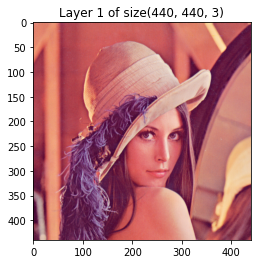

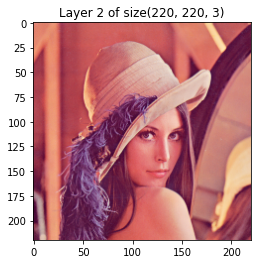

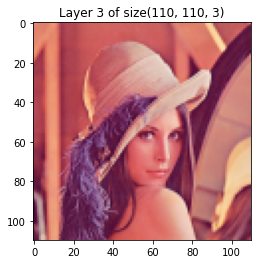

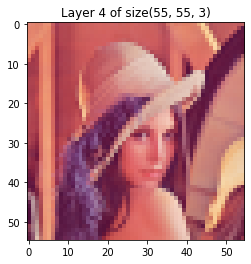

In [17]:
img = cv2.imread("Images/lena.png",1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

pyramid_list_method_1 = pyramid(img, scale=2.0)

for i in range (len(pyramid_list_method_1)):
  plt.imshow(pyramid_list_method_1[i])
  plt.title("Layer "+ str(i+1)+ " of size" + str(pyramid_list_method_1[i].shape))
  plt.show()

## Method 2: OpenCV pyrDown()

It Blurs an image and downsamples it.

By default, size of the output image is computed as ((img.cols+1)/2, (img.rows+1)/2)
The function performs the downsampling step of the Gaussian pyramid construction. First, it convolves the source image with the kernel.

Then, it downsamples the image by rejecting even rows and columns.

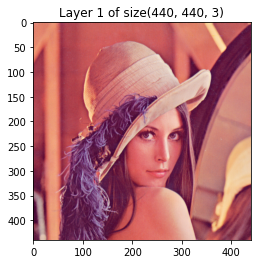

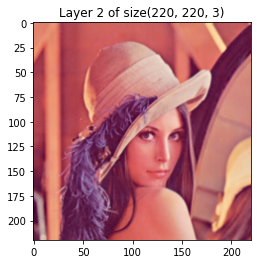

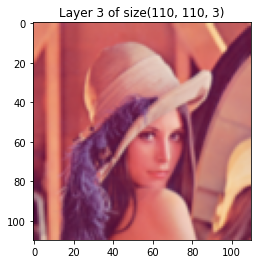

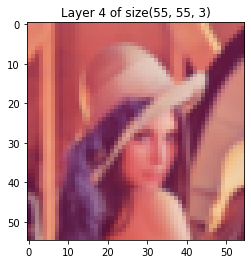

In [18]:
def pyramid(image, scale=2.0, minSize=(30, 30)):
  image_pyramid = []
  #append higher layer
  image_pyramid.append(image)
  while(True):
    current_size = (image.shape[0]/scale,image.shape[1]/scale)
    #threshold
    if (current_size > minSize):
      image = cv2.pyrDown(image)
      image_pyramid.append(image)
    else:
      return image_pyramid

#read image
img = cv2.imread("Images/lena.png",1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

pyramid_list_method_2 = pyramid(img,2.0,(30,30))

for i in range(len(pyramid_list_method_2)):
  plt.imshow(pyramid_list_method_2[i])
  plt.title("Layer "+ str(i+1) +" of size" + str(pyramid_list_method_2[i].shape))
  plt.show()

## Method 3: Image pyramids with Python + scikit-image

The second method to image pyramid construction utilizes Python and scikit-image. The scikit-image library already has a built-in method for constructing image pyramids called pyramid_gaussian.

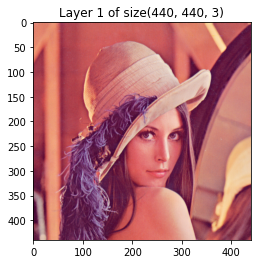

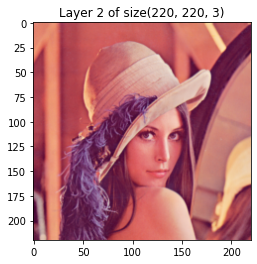

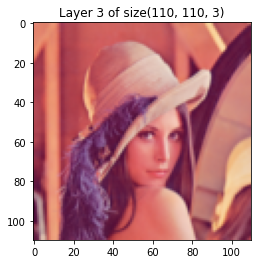

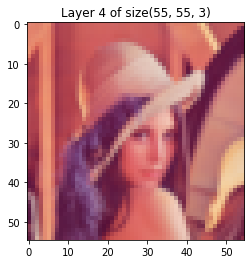

In [19]:
from skimage.transform import pyramid_gaussian

#pyramid_gaussian return iterate object

for (i,resized) in enumerate(pyramid_gaussian(img,downscale=2, multichannel = True)):
  #check for thresold
  if (resized.shape[0] > 30 or resized.shape[1] > 30):
    plt.imshow(resized)
    plt.title("Layer "+ str(i+1) +" of size" + str(resized.shape))
    plt.show()
  else:
    break